# Image Classification with MNIST Dataset

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import numpy as np

# Load Data

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preview Sample

Actual Label= 8


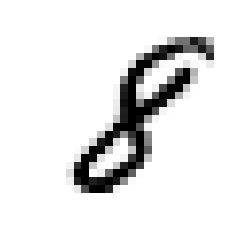

In [131]:
image_index = 7777 # You may select anything up to 60,000
print("Actual Label=",y_train[image_index]) # The label is 8
plt.axis('off')
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

# Split Distribution

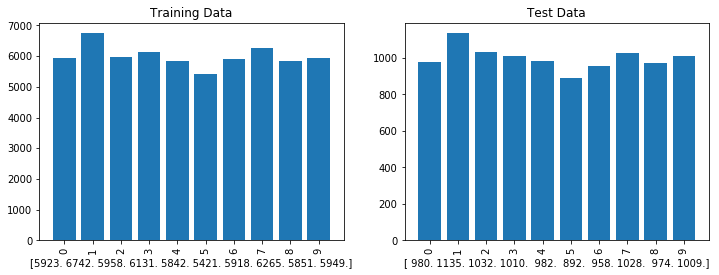

In [89]:
plt.figure(figsize=(12,4))
plt.subplot('121')
Y_histogram=keras.utils.to_categorical(y_train, 10)   
Y_histogram=Y_histogram.sum(axis=0)
plt.bar(range(10),Y_histogram)
plt.xticks(range(10),rotation=90)
plt.xlabel(Y_histogram)
plt.title("Training Data")


plt.subplot('122')
Y_histogram=keras.utils.to_categorical(y_test, 10)   
Y_histogram=Y_histogram.sum(axis=0)
plt.bar(range(10),Y_histogram)
plt.xticks(range(10),rotation=90)
plt.xlabel(Y_histogram)
plt.title("Test Data")
plt.show()

# Input Transformations

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# Model

In [10]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train

In [11]:
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1939 - acc: 0.9419
Epoch 2/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0795 - acc: 0.9760
Epoch 3/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0579 - acc: 0.9810
Epoch 4/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0419 - acc: 0.9865
Epoch 5/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0332 - acc: 0.9890
Epoch 6/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0276 - acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0247 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0225 - acc: 0.9923: 0s - loss: 0.0224 - acc
Epoch 9/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0181 - acc: 0.9941
Epoch 10/10
60000/60000 [==

# Evaluate 

In [12]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 209us/step


[0.062265750045949246, 0.986]

# Save Model

In [13]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'mnist.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Load Model

In [6]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'mnist.h5'
model_path = os.path.join(save_dir, model_name)
model=load_model(model_path)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


# Predict

Predicted Value= 9


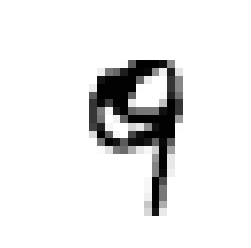

In [132]:
image_index = 4444
plt.axis('off')
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))

print("Predicted Value=",pred.argmax())

# Create Confusion Matrix

In [30]:
def getConfusionMatrix(Y_True,Y_Pred):
    classCount=Y_True.shape[1]
    #in case Y is in term of probablities
    Y_Pred=keras.utils.to_categorical(Y_Pred.argmax(axis = 1), classCount) 
    cnfMtrx=np.zeros((classCount,classCount))
    for i in range(classCount):
        cnfMtrx[i,:]=Y_Pred[np.where(Y_True[:,i]==1)].sum(axis=0)
    return cnfMtrx

In [31]:
Y_pred = model.predict(x_test.reshape(x_test.shape[0], 28, 28, 1))
Y_true = keras.utils.to_categorical(y_test,10)
confusion_mtx = getConfusionMatrix(Y_true, Y_pred)

# Plot Confusion Matrix

In [39]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Confusion matrix')
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,rotation=90)
    plt.yticks(tick_marks, classes)

    for i in range(cm.shape[0]):
        for j in (range(cm.shape[1])):
            if cm[i, j] > cm.max() / 2:
                txtclr="white"
            else:
                txtclr="black"
            plt.text(j, i, cm[i, j],horizontalalignment="center",color=txtclr)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
       

    plt.colorbar()
    plt.show()


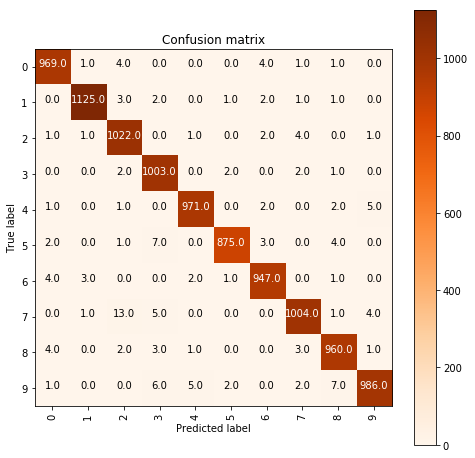

In [41]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

# Results Analysis
Find images the model labeled incorrectly.

In [127]:
def print_mislabeled_images(classes, test_set_x, test_set_y, Y_prediction_test,maxPrint=20,startIndex=0):
    a = Y_prediction_test.argmax(axis=1) - test_set_y
    mislabeled_indices = np.asarray(np.where(a != 0))
    num_images = len(mislabeled_indices[0])
    plt.figure(figsize=(10,16))
    
    print("Showing from ",startIndex," to ",startIndex-1+np.min([num_images,maxPrint,num_images-startIndex+1]), " of total ",num_images, "mislabeled.") 
    num_images=np.min([num_images,maxPrint,num_images-startIndex+1]) 
    for i in range(num_images):
        index = mislabeled_indices[0][i+startIndex-1]
        plt.subplot( int(maxPrint/4)+1, 5, i + 1)
        plt.axis('off')
        plt.imshow(test_set_x[index].reshape(28, 28),cmap='Greys',interpolation='nearest')
        plt.title("Pred: " + str(classes[(Y_prediction_test.argmax(axis=1)[index])])
                  + " \n Actual: " + str(classes[test_set_y[index]]))
    plt.show()

In [128]:
startIndex=1
maxPrint=20

## Run Cell Again and Again to View All 

Showing from  1  to  20  of total  138 mislabeled.


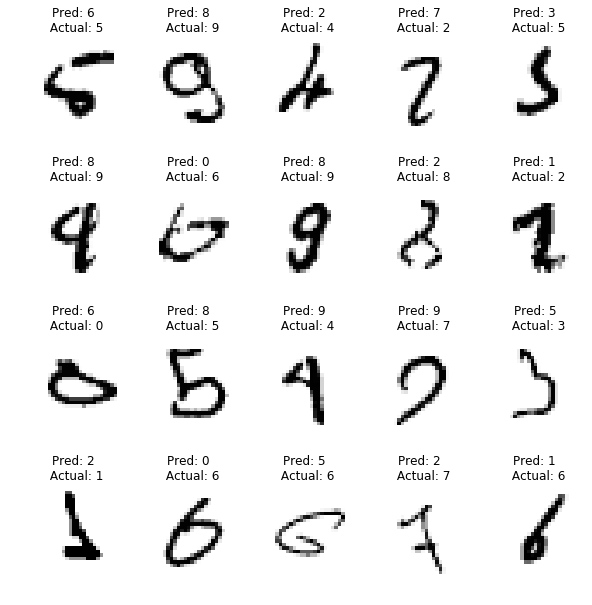

In [129]:
print_mislabeled_images(range(10), x_test, y_test, Y_pred,maxPrint=maxPrint,startIndex=startIndex)
startIndex=startIndex+maxPrint